In [22]:
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

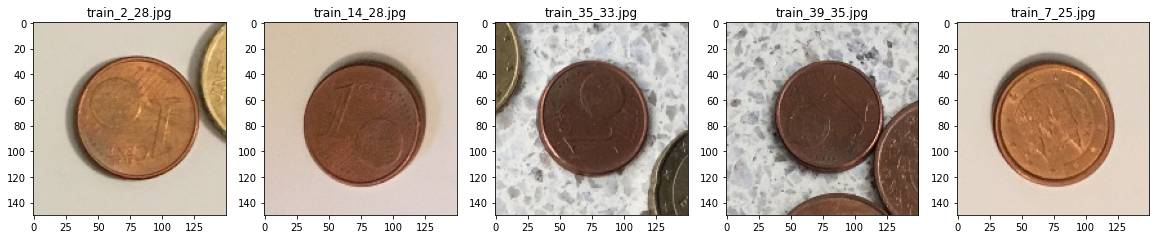

In [4]:
plt.figure(figsize=(20,20))
img_folder=r'/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/coins/train/1c'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [9]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder='/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/coins/train/'

In [10]:
folder = os.listdir(img_folder)
print(folder)

['10c', '50c', '.DS_Store', '20c', '5c', '2c', '1e', '1c', '2e']


In [11]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]

    folder = os.listdir(img_folder)
    folder = [ x for x in folder if ".DS_Store" not in x ]  

    for dir1 in folder:
        files = os.listdir(os.path.join(img_folder, dir1))
        files = [ x for x in files if ".DS_Store" not in x ] 
        for file in files:
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = create_dataset(img_folder)

In [12]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'10c': 0, '1c': 1, '1e': 2, '20c': 3, '2c': 4, '2e': 5, '50c': 6, '5c': 7}

In [13]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [20]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(8)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Train on 1291 samples
Epoch 1/5
1291/1291 [==============================] - 1s 710us/sample - loss: 3.6836 - accuracy: 0.1905
Epoch 2/5
1291/1291 [==============================] - 0s 188us/sample - loss: 2.0794 - accuracy: 0.1836
Epoch 3/5
1291/1291 [==============================] - 0s 172us/sample - loss: 2.0794 - accuracy: 0.1836
Epoch 4/5
1291/1291 [==============================] - 0s 173us/sample - loss: 2.0794 - accuracy: 0.1836
Epoch 5/5
1291/1291 [==============================] - 0s 173us/sample - loss: 2.0794 - accuracy: 0.1836


In [25]:
img = Image.open('/Users/tobiasschulz/Documents/GitHub/ai-fall-exercises/M6/06. Contours and Blob detection/img/cropped2/1.png').convert("L")
img = np.resize(img, (28,28,3))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,3)
test_image = (im2arr[...,::-1].astype(np.float32)) / 255.0 
y_pred = model.predict_classes(test_image)
print(y_pred)

[2]
